# Pi4 Optimization Benchmarks
*Ubuntu 22.04 VM - 8vCores - Ryzen 7 5800X (3,8-4,7 GhHz)*

In [124]:
import pandas as pd

flag_list = [ '-f', '-i', '-n', '-d', '-f -i -n -d' ]
title_list = [ 'fold_substitution', 'includes_cache', 'length_cache', 'dynamic_maxlen', 'optimized']

data = pd.read_csv('./results_final.csv', index_col=0)
data = data.fillna('unoptimized')
data = data.replace(flag_list, title_list)
data = data.groupby(['program', 'flags']).mean()
data = pd.pivot_table(
    data,
    values='runtime',
    index='program',
    columns='flags',
)
data

flags,dynamic_maxlen,fold_substitution,includes_cache,length_cache,optimized,unoptimized
program,,,,,,
determined_forwarding_safe,29.541304,41.645589,41.824781,41.598725,29.127973,56.114449
determined_forwarding_unsafe,29.398224,250.068418,249.151786,250.746978,29.143644,255.377222
header_dependency_safe,47.351169,747.617147,749.378316,289.601677,26.642033,751.011242
header_dependency_unsafe,43.278484,1034.909072,1322.734552,733.875798,18.507999,1307.543488
ipv4_opt_safe,101.981654,1899.245364,2233.625690,1237.649008,59.317878,2219.483962
ipv4_opt_unsafe,77.631179,1807.035678,2071.900234,931.684895,34.028374,2075.454110
ipv4_ttl_safe,39.321341,251.702567,278.140272,278.010658,36.486187,277.260077
ipv4_ttl_unsafe,28.987167,351.647068,333.673406,336.319002,26.144793,334.528424
mutual_exclusion_ingress_safe,39.825825,225.086298,228.191584,228.951730,37.297709,230.196164


Text(0, 0.5, 'Check-Time [ms]')

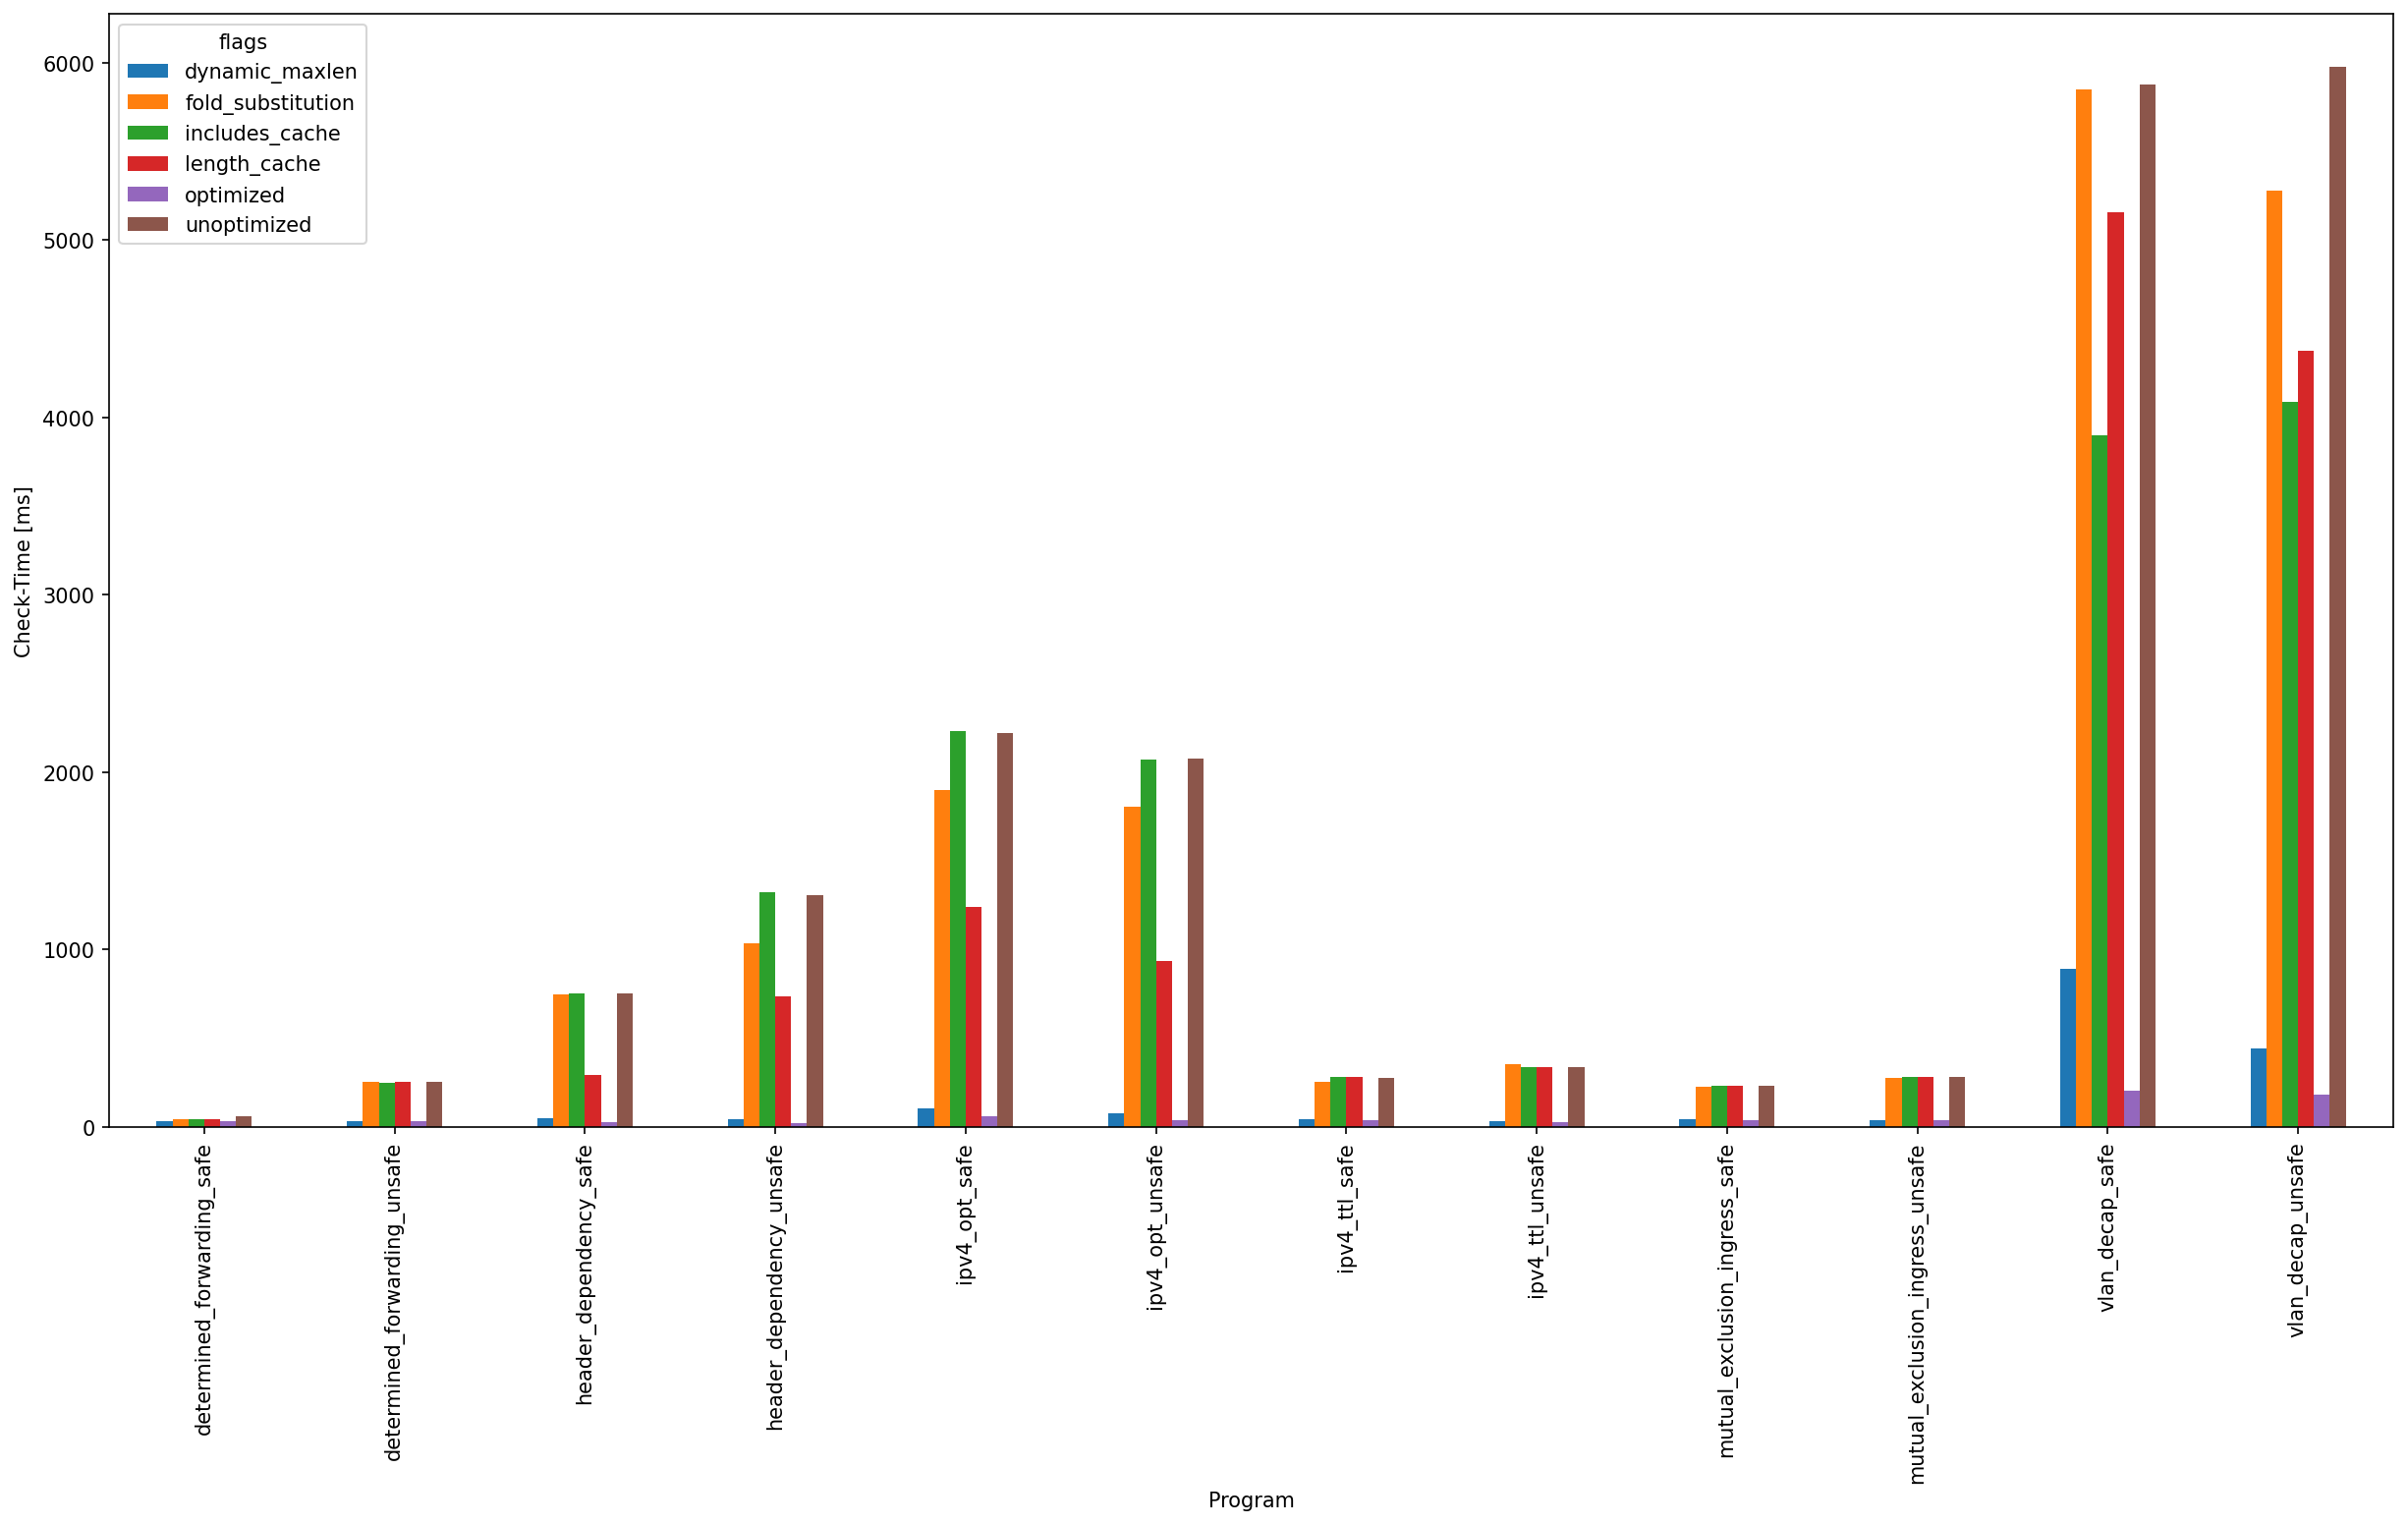

In [125]:
plot = data.plot(kind='bar')
fig = plot.get_figure()
fig.set_size_inches(20, 10)
fig.set_dpi(150)
plot.set_xlabel("Program")
plot.set_ylabel("Check-Time [ms]")

In [126]:
data_rel = data.copy()
for title in title_list:
    data_rel[title] = (100 / data_rel['unoptimized']) * (data_rel['unoptimized'] - data_rel[title])
del data_rel['unoptimized']
data_rel

flags,dynamic_maxlen,fold_substitution,includes_cache,length_cache,optimized
program,,,,,
determined_forwarding_safe,47.355263,25.784553,25.465219,25.868067,48.091849
determined_forwarding_unsafe,88.488314,2.078809,2.437741,1.813100,88.588002
header_dependency_safe,93.695012,0.451937,0.217430,61.438437,96.452512
header_dependency_unsafe,96.690092,20.850887,-1.161802,43.873699,98.584521
ipv4_opt_safe,95.405164,14.428516,-0.637163,44.237083,97.327402
ipv4_opt_unsafe,96.259557,12.932998,0.171234,55.109347,98.360437
ipv4_ttl_safe,85.817886,9.217883,-0.317462,-0.270714,86.840447
ipv4_ttl_unsafe,91.334917,-5.117246,0.255589,-0.535254,92.184583
mutual_exclusion_ingress_safe,82.699179,2.219788,0.870814,0.540597,83.797424


Text(0, 0.5, 'Relative reduction of Runtime [%]')

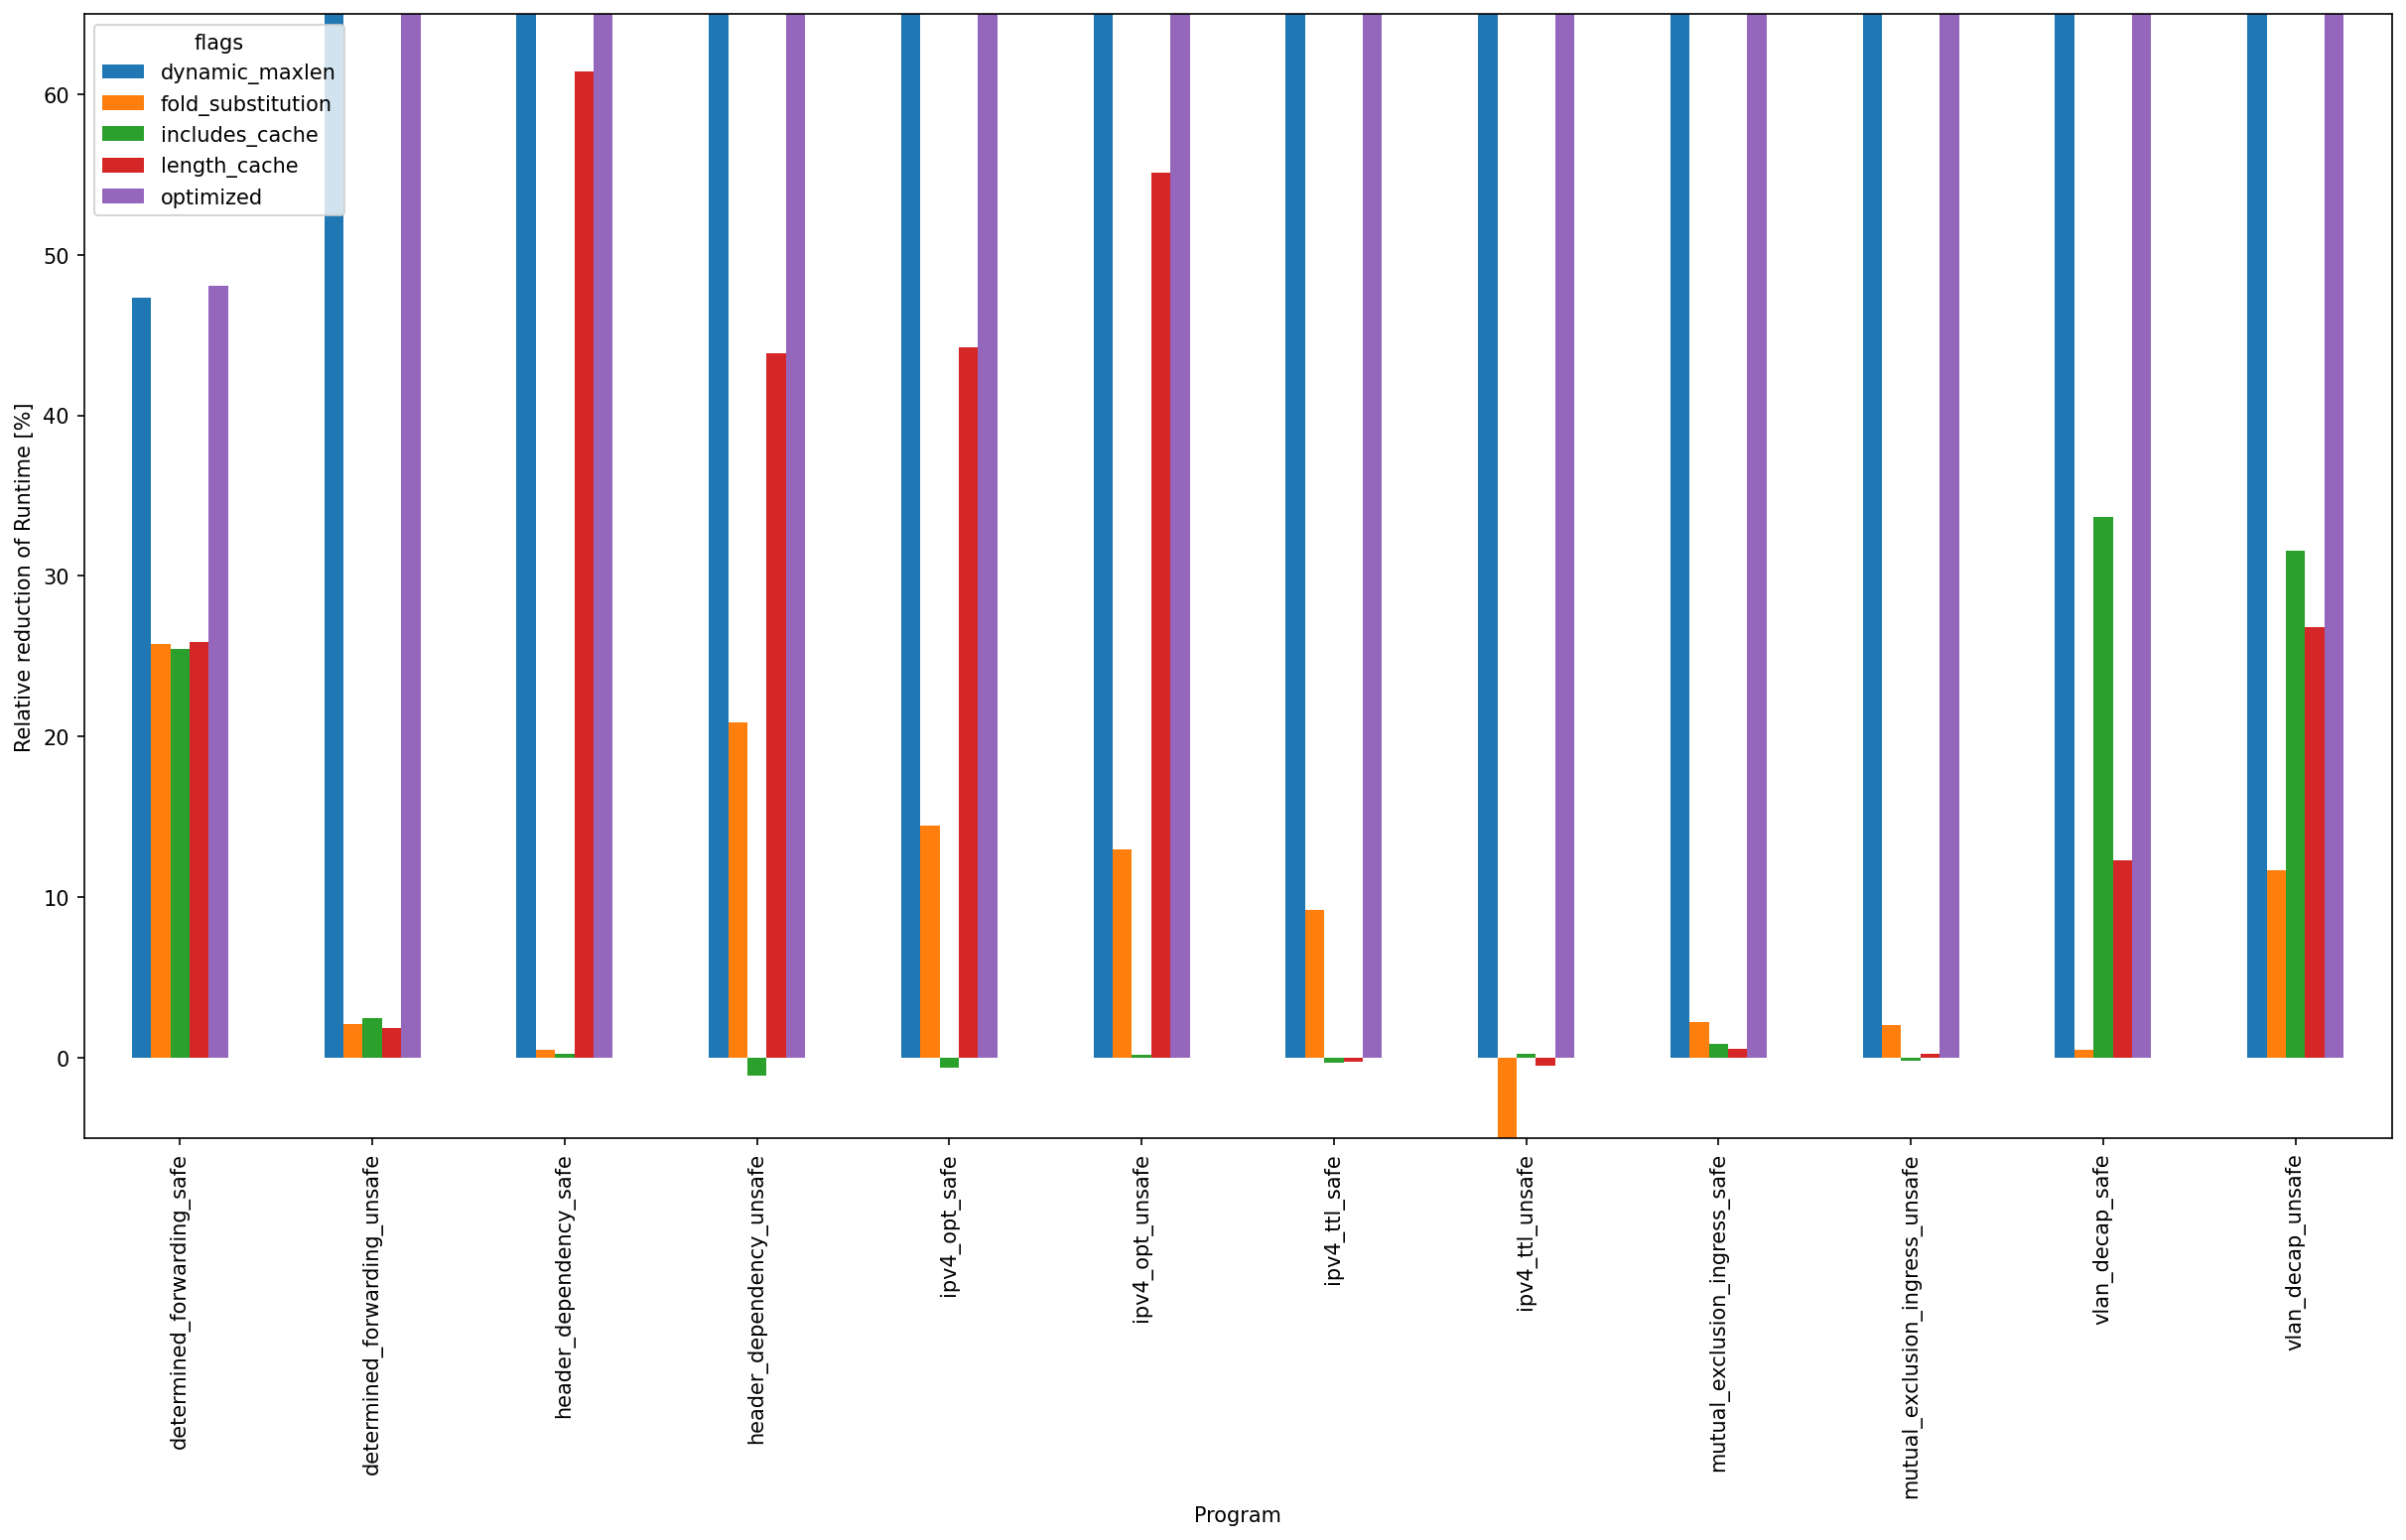

In [127]:
plot = data_rel.plot(kind='bar')
fig = plot.get_figure()
fig.set_size_inches(20, 10)
fig.set_dpi(150)
plot.set_ylim(-5, 65)
plot.set_xlabel("Program")
plot.set_ylabel("Relative reduction of Runtime [%]")

In [128]:
data_mean = data_rel.copy().mean()
data_mean

flags
dynamic_maxlen       86.845681
fold_substitution     8.086902
includes_cache        7.692865
length_cache         22.614082
optimized            89.255662
dtype: float64

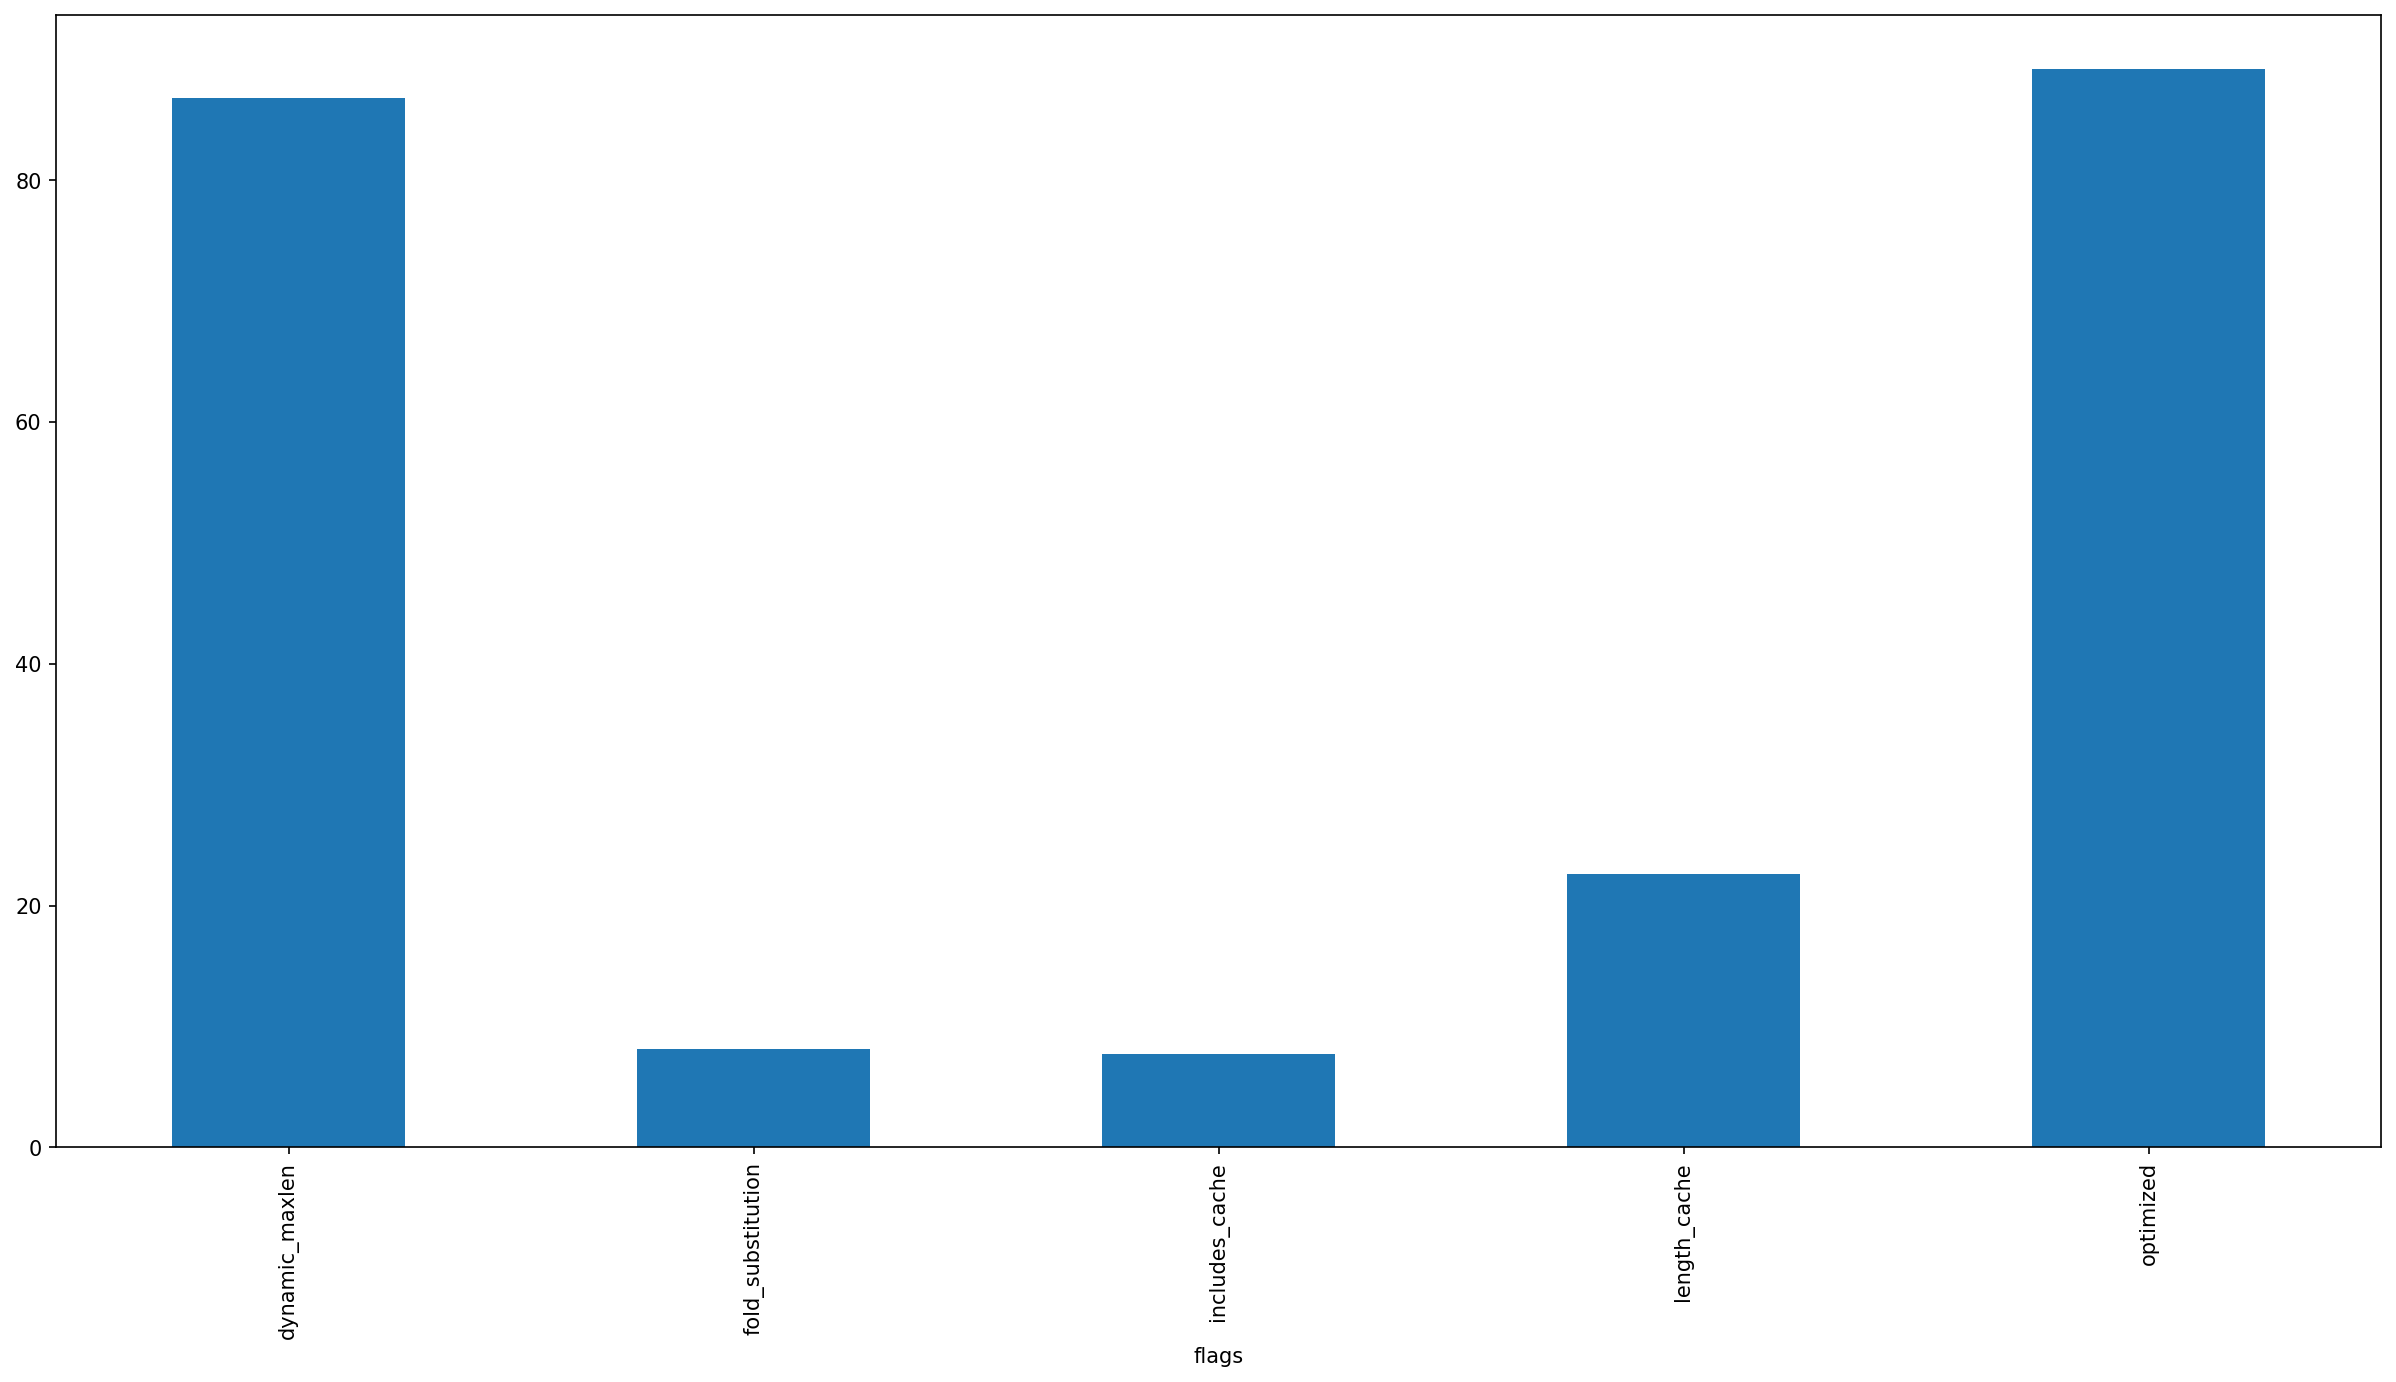

In [129]:
plot = data_mean.plot(kind='bar')
fig = plot.get_figure()
fig.set_size_inches(20, 10)
fig.set_dpi(150)

In [130]:
import pandas as pd

flag_list = [ '-f', '-i', '-n', '-d', '-f -i -n -d' ]
title_list = [ 'fold_substitution', 'includes_cache', 'length_cache', 'dynamic_maxlen', 'optimized']

data_r = pd.read_csv('./roundtrip.csv', index_col=0)
data_r = data_r.fillna('unoptimized')
data_r = data_r.replace(flag_list, title_list)
data_r = data_r.groupby(['program', 'flags']).mean()
data_r = pd.pivot_table(
    data_r,
    values='runtime',
    index='program',
    columns='flags',
)
data_r

flags,dynamic_maxlen,fold_substitution,includes_cache,length_cache,optimized,unoptimized
program,,,,,,
roundtripping_safe,1152.206997,46985.243648,50569.748111,50513.38615,806.675371,51104.931601
roundtripping_unsafe,262.271150,2013.956721,2176.004285,1440.10809,139.740987,2240.238696


Text(0, 0.5, 'Check-Time [ms]')

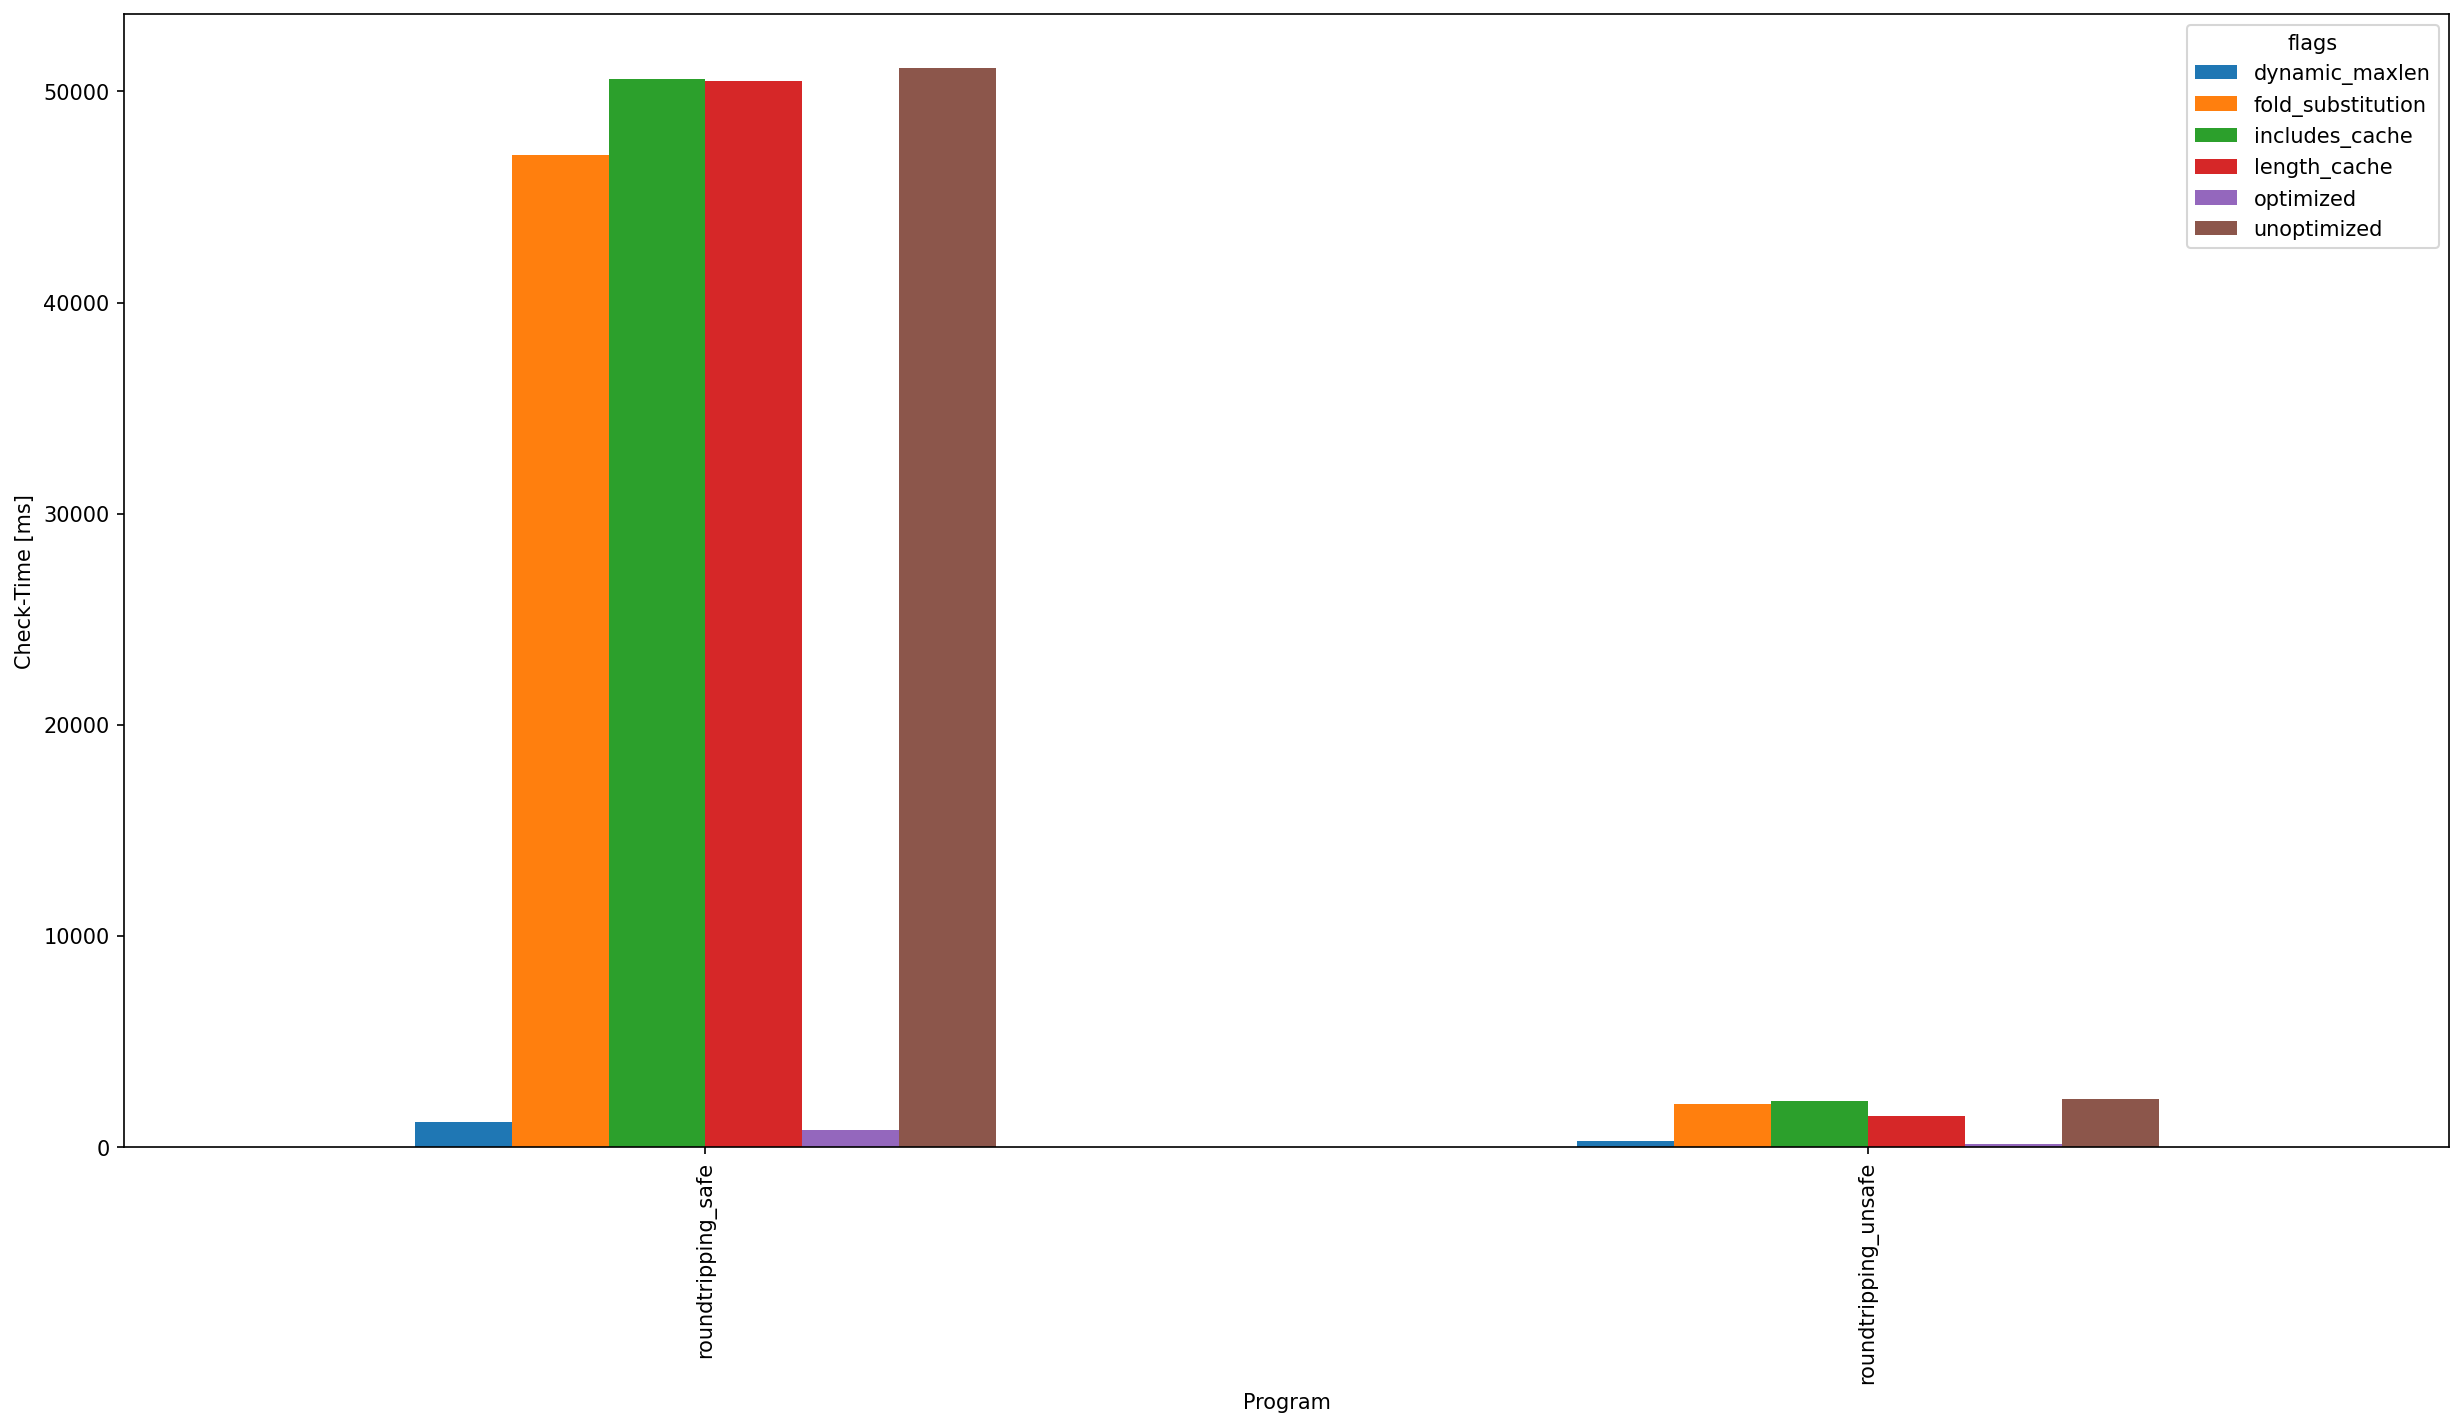

In [131]:
plot = data_r.plot(kind='bar')
fig = plot.get_figure()
fig.set_size_inches(20, 10)
fig.set_dpi(150)
plot.set_xlabel("Program")
plot.set_ylabel("Check-Time [ms]")

In [132]:
data_r_rel = data_r.copy()
for title in title_list:
    data_r_rel[title] = (100 / data_r['unoptimized']) * (data_r['unoptimized'] - data_r[title])
del data_r_rel['unoptimized']
data_r_rel

flags,dynamic_maxlen,fold_substitution,includes_cache,length_cache,optimized
program,,,,,
roundtripping_safe,97.745409,8.061234,1.047225,1.157511,98.421531
roundtripping_unsafe,88.292714,10.100798,2.867302,35.716310,93.762228


Text(0, 0.5, 'Relative reduction of Runtime [%]')

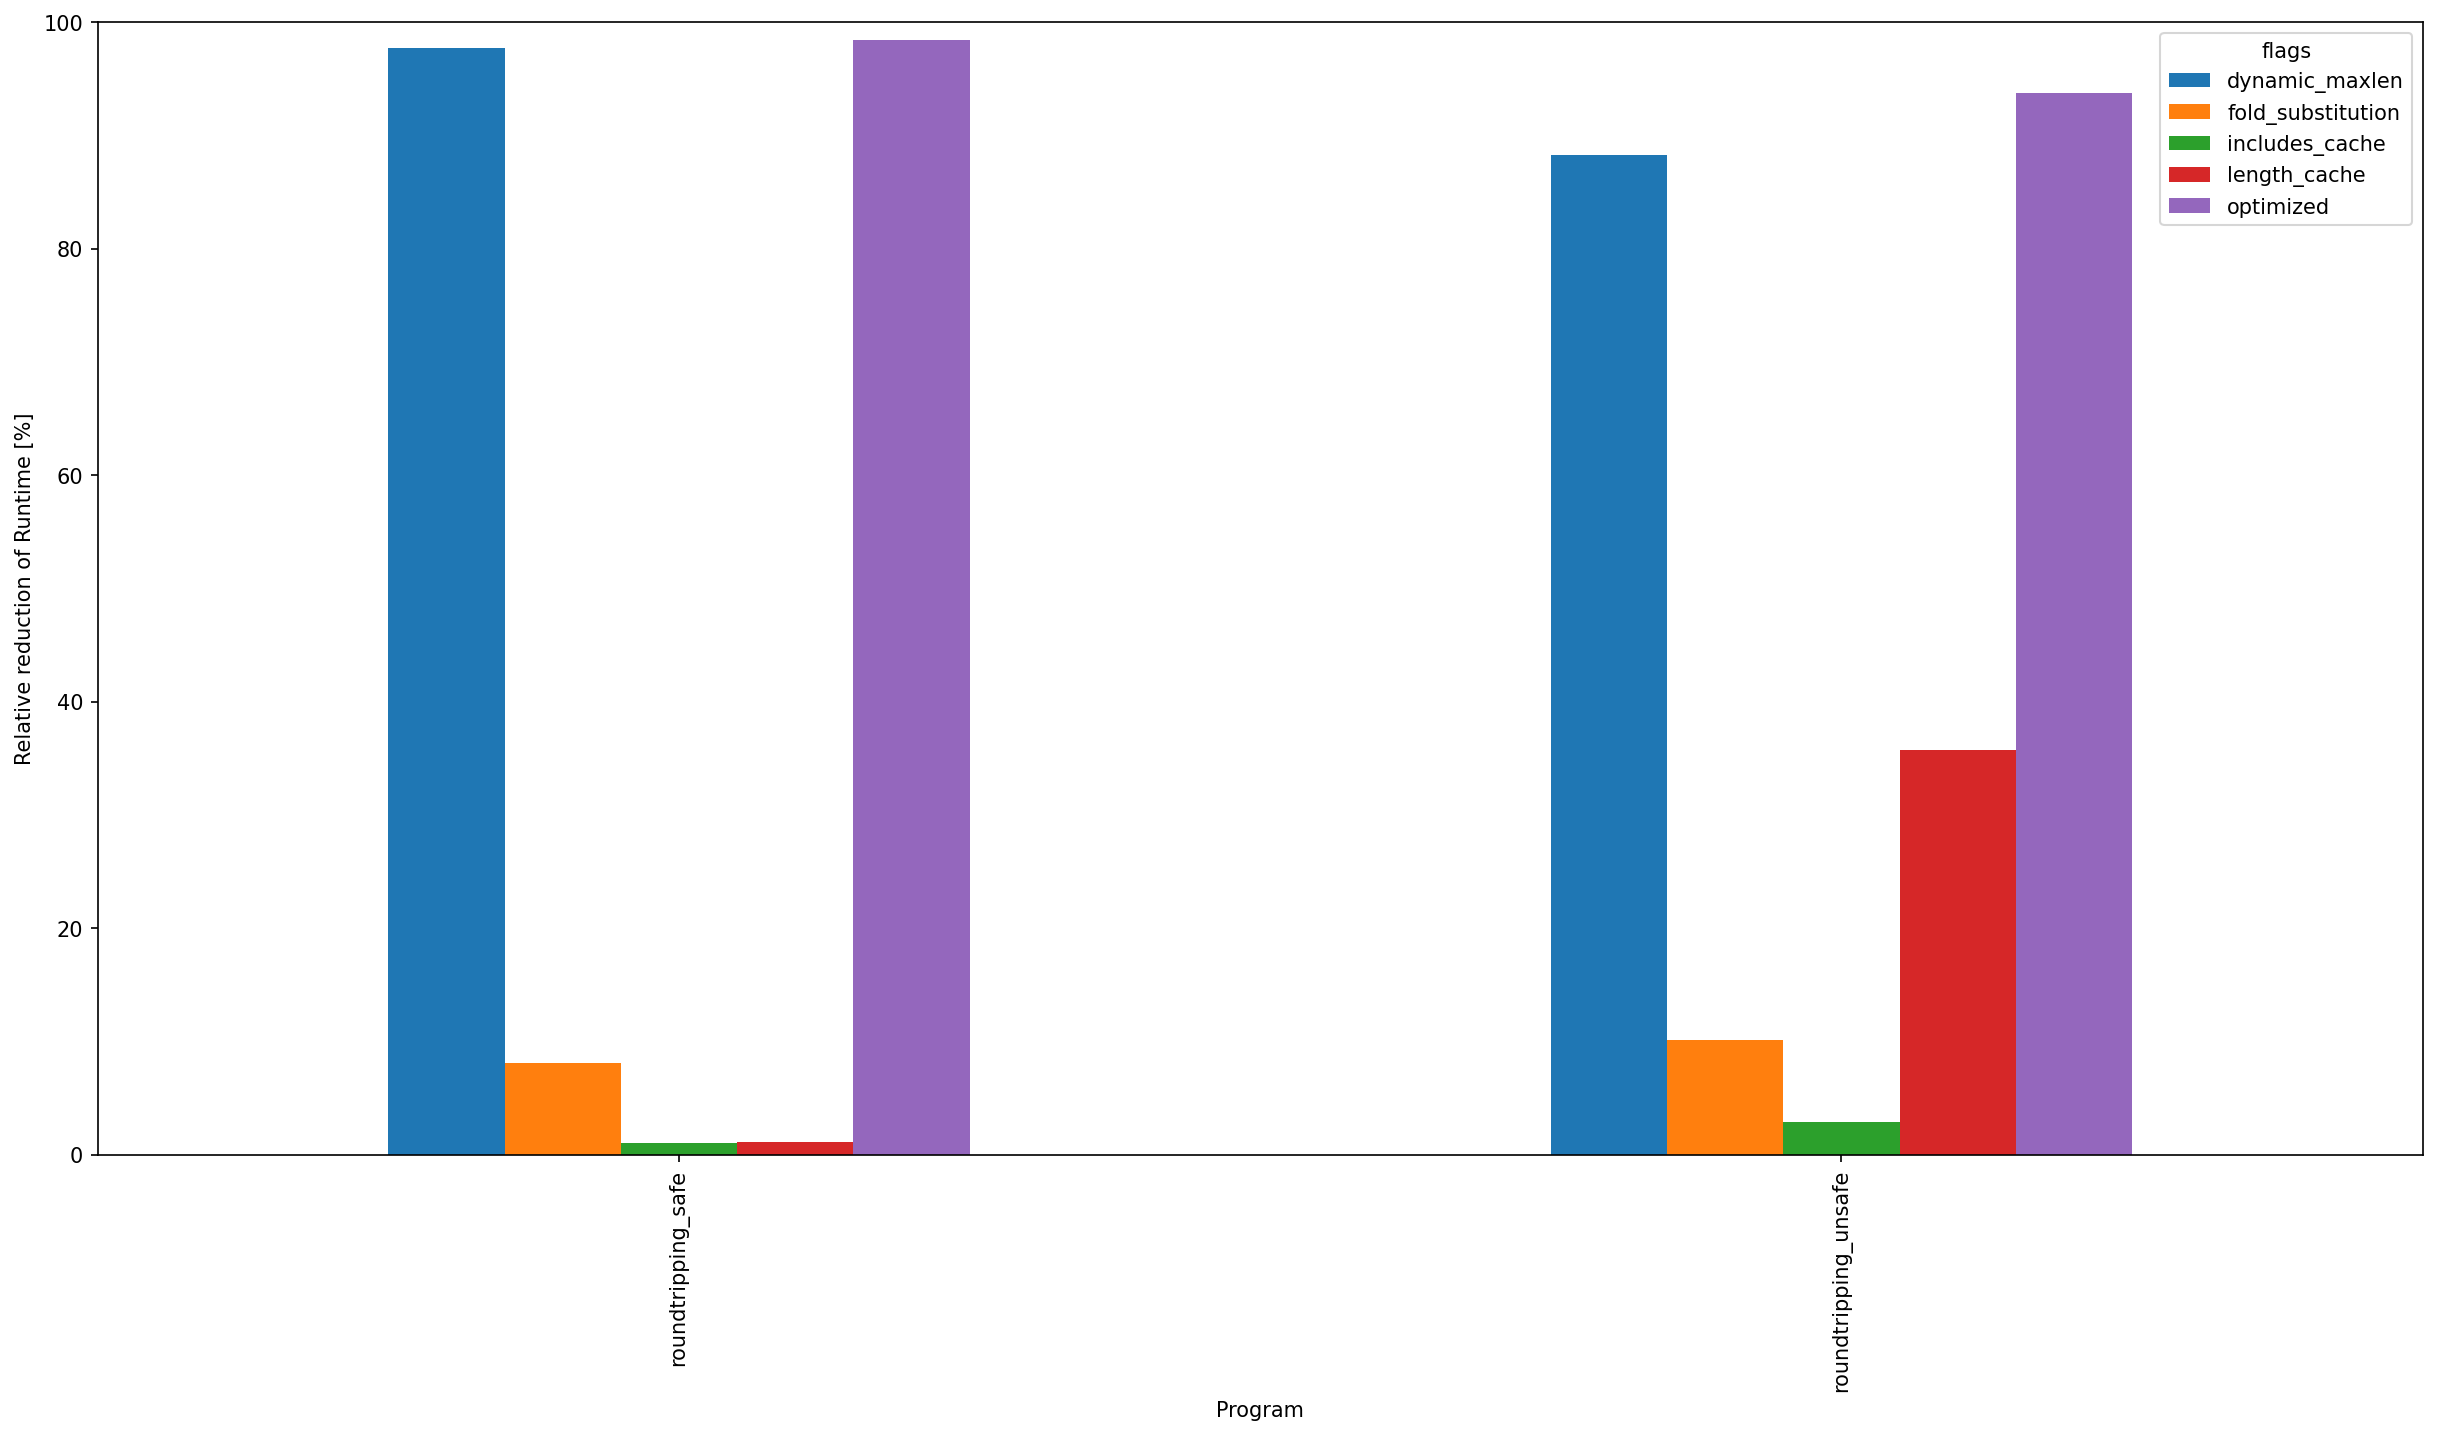

In [134]:
plot = data_r_rel.plot(kind='bar')
fig = plot.get_figure()
fig.set_size_inches(20, 10)
fig.set_dpi(150)
plot.set_ylim(0, 100)
plot.set_xlabel("Program")
plot.set_ylabel("Relative reduction of Runtime [%]")